In [2]:
!pip install helper

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import helper
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
transforms = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5,),(0.5,))])

trainset = datasets.MNIST('../datasets/', train=True,transform=transforms)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,shuffle=True)

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


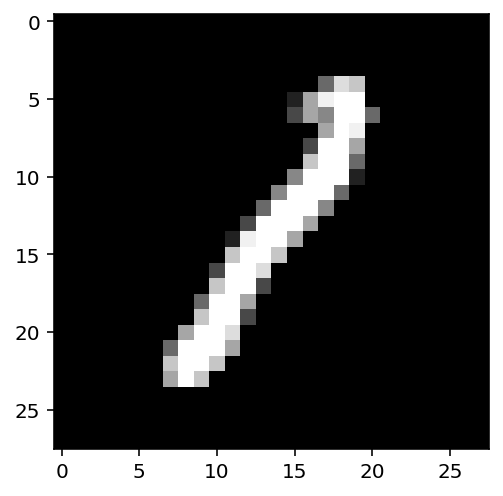

In [5]:
# .squeeze() removes dimensions of size 1.. eg if shape of a matrix is (1,28,28), then output after squeezing will be (28,28)
plt.imshow(images[37].numpy().squeeze(), cmap='Greys_r')
plt.show()

In [6]:
images.view(images.shape[0],784).shape

torch.Size([64, 784])

In [7]:
images.view(images.shape[0], -1).shape

torch.Size([64, 784])

## Simple Neural Network from scratch

In [32]:
def activation(x):
    return (1/(1 + torch.exp(-x)))

def softmax(x):
    # converting the sum to shape of 64 by 1 since
    # the torch.sum returns a vector col. with 64 values.
    # we have to convert it to a shape of 64 rows with one val. per row in order to divide
    return (torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1))

inputs = images.view(images.shape[0], -1)

n_inputs = inputs.shape[1]
n_hidden = 256
n_outputs = 10

W1 = torch.randn(n_inputs,n_hidden)
W2 = torch.randn(n_hidden,n_outputs)

B1 = torch.randn(n_hidden)
B2 = torch.randn(n_outputs)

y_hidden = activation(torch.mm(inputs, W1) + B1)
y_output = softmax(torch.mm(y_hidden, W2) + B2)

In [33]:
print(y_hidden.shape)
print(y_hidden.dtype)

torch.Size([64, 256])
torch.float32


In [34]:
y_output[:5]

tensor([[8.2410e-11, 4.5492e-17, 9.5295e-17, 4.5755e-08, 1.4235e-14, 2.7243e-07,
         2.7023e-13, 1.4242e-24, 6.9214e-22, 1.0000e+00],
        [4.0257e-12, 8.9219e-23, 1.3759e-19, 3.3964e-06, 6.5470e-17, 7.1765e-12,
         1.5763e-12, 1.3024e-18, 2.1452e-13, 1.0000e+00],
        [2.3465e-09, 2.4529e-17, 3.7697e-12, 7.7249e-07, 1.9176e-16, 3.4161e-14,
         2.0236e-13, 7.9580e-24, 7.5195e-18, 1.0000e+00],
        [7.6532e-13, 5.8329e-22, 4.0097e-19, 1.7767e-08, 3.3781e-16, 2.2086e-11,
         2.4400e-17, 6.7751e-22, 3.9118e-15, 1.0000e+00],
        [1.2375e-08, 1.5946e-20, 3.2931e-15, 2.7392e-06, 4.3223e-12, 1.5381e-14,
         3.9818e-10, 2.2297e-17, 9.3516e-16, 1.0000e+00]])

In [35]:
W1[:5]

tensor([[-0.5662,  1.0968, -1.1065,  ..., -1.1310, -0.0120, -0.8032],
        [ 0.0660, -1.1750,  1.4117,  ...,  0.3493,  0.8629,  0.4959],
        [ 0.7433, -0.5743, -1.3336,  ..., -1.0239,  0.7439, -1.2022],
        [ 0.8195,  2.1449, -1.3028,  ...,  1.6202, -1.2592, -0.0570],
        [ 1.1579,  2.0316, -1.4446,  ..., -0.4407, -1.6905,  0.0034]])

In [36]:
print(y_output.sum(dim=1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])
